In [37]:
# import the neccessary dependacies we will use by default
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

Some insights into this project:
- The category of machine learning models that these fall into is _supervised learning_. Supervised learning is a type of machine learning where the model is trained on labeled data. The label in this case is the method of data breach.

The models that will be tested out will fall into the following category of machine learning:
* <u><b>Logistic Regression</b></u>: This is a supervised Learning that can be used to predict a categorical outcome. In this case, the categorical outcome is the method of the data breach. The features that will be used are: entity, year, records and organization type.
* <u><b>Decision Trees</b></u>: This is another supervised learning algorithm that can be used to predict a categorical outcome. Decision trees work by creating a tree-like structure that represents the relationships between the features and the outcomes.
* <u><b>Support Vector Machine(SVMs):</u></b> This is a supervised learning algorithm that can be used to predict both categorical and continous outcomes. SVMs work by finding the hyperplane that best seperates the data points into different classes.
* <u><b>Random Forests</u></b> This is an ensemble learning algorithm that combines multiple decision trees to improve the accuracy of the predictions.
* <u><b>Neural Networks</u></b> This is a more complex algorithm that can be used to predict both categorical and continuous outcomes. Neural Networks work by learning the relationships between the features and the outcome through a process called backpropogation.

In [38]:
# load the dataset(s) we will be using
csv_file_path = os.path.abspath('df_1.csv');  # get the absolute path of the CS

df = pd.read_csv(csv_file_path);   # Read the CSV file into a datafram
# display the head to see if the dataset works as intended
df.head(10)  #adjust the parameter value as needed

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
5,5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media,[13][14]
6,6,AerServ (subsidiary of InMobi),2018,75000,advertising,hacked,[15]
7,7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media,[16][17]
8,8,Airtel,2019,320000000,telecommunications,poor security,[18]
9,9,Air Canada,2018,20000,transport,hacked,[19]


From my exploration, I discovered that dataframe 3 and dataframe 1 are the same, so merging them would be useless, dataframe 2 is different from dataframe 1, therefore, merging them holds some value.

In [39]:
df.dtypes  # simply lists out the datatype we are working with

Unnamed: 0            int64
Entity               object
Year                 object
Records              object
Organization type    object
Method               object
Sources              object
dtype: object

In [40]:
df.columns # observe the column list

Index(['Unnamed: 0', 'Entity', 'Year', 'Records', 'Organization type',
       'Method', 'Sources'],
      dtype='object')

In [41]:
# we will need to rename the unnamed column
df.rename(columns={'Unnamed: 0' : 'Index'}, inplace=True)

In [42]:
# Test out the number of unique values contained in Entity
len(df['Entity'].unique())   #there's a total of 331 unique name for comapnies

331

Regarding the column __Entity__, there's 2 options in terms of data preprocessing:
* Drop the column altogether
* Apply Hashing

In [43]:
import hashlib

#create a hash function
def hash_function(text):
    return hashlib.sha256(text.encode()).hexdigest()

# create a new column for the hashed values
df['hashed_Entity'] = df['Entity'].apply(hash_function)

#observe the hashed column
df.head()  # we have the hashed entity

,Index,Entity,Year,Records,Organization type,Method,Sources,hashed_Entity
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6],c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,500px,2020,14870304,social networking,hacked,[7],39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9],d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10],4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12],4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...


In [44]:
# create a copy of the dataframe and drop the Entity column 
df_copy1 = df.drop(columns={'Entity'})

In [45]:
df_copy1  # we don't want to make modifications to the original dataframe 

,Index,Year,Records,Organization type,Method,Sources,hashed_Entity
0,0,2016,2200000,healthcare,hacked,[5][6],c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,social networking,hacked,[7],39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,healthcare,poor security,[8][9],d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,tech,hacked,[10],4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,tech,poor security,[11][12],4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...
...,...,...,...,...,...,...,...
347,347,2019,173000000,social network,hacked,[406][407],637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...
348,348,2020,200000000,financial,accidentally published,[408],985ee128022c38982d1de4c4173f538ced9151f0517fe9...
349,349,2020,391250,healthcare,poor security,[409],869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...
350,350,2022,6400000,various,poor security,[410] [411],89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...


In [46]:
len(df_copy1['Organization type'].unique())   # in terms of organization type, there's 70 different unique values
df_copy1

,Index,Year,Records,Organization type,Method,Sources,hashed_Entity
0,0,2016,2200000,healthcare,hacked,[5][6],c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,social networking,hacked,[7],39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,healthcare,poor security,[8][9],d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,tech,hacked,[10],4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,tech,poor security,[11][12],4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...
...,...,...,...,...,...,...,...
347,347,2019,173000000,social network,hacked,[406][407],637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...
348,348,2020,200000000,financial,accidentally published,[408],985ee128022c38982d1de4c4173f538ced9151f0517fe9...
349,349,2020,391250,healthcare,poor security,[409],869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...
350,350,2022,6400000,various,poor security,[410] [411],89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...


In [47]:
# remove the special characters
df_copy1['Organization type'] = df_copy1['Organization type'].str.replace(',', '_')  # replace the cases of ',' with '_'.
df_copy1['Organization type'] = df_copy1['Organization type'].str.replace(' ', '_') # we also replace the cases of spacing with '_'.
df_copy1['Organization type'] = df_copy1['Organization type'].str.replace('__', '_')  # replace all instances of __ with _

Before encoding the organization type, I've copied the df to keep the original data intact. I'm dropping the hashed_Entity column as it is not needed for visualizing – we want to focus on industries and not individual companies.

In [56]:
df_vis = df_copy1  #create another copy of the df_copy and perform further data preprocessing
#drop the hashed entity column
df_vis.drop(columns={'hashed_Entity'}, inplace=True)  #note: after dropping the column the first time, you may end up running into an error if you were to rerun the code block again
#drop the Sources column
df_vis.drop(columns={'Sources'}, inplace=True)
df_vis

KeyError: "['hashed_Entity'] not found in axis"

In [57]:
# Initialize a list to store index positions and non-integer values as tuples
non_integer_records = []

# Initialize a set to store unique industries
unique_industries = set()

# Iterate through the 'Records' column and collect non-integer values with their index positions and industry
for index, (value, industry) in enumerate(zip(df_vis['Records'], df_vis['Organization type'])):
    try:
        int_value = int(value)
    except ValueError:
        non_integer_records.append((index, str(value), industry))
        unique_industries.add(industry)

# Print the index positions, values, and industries for non-integer values
if non_integer_records:
    print("Non-integer values in the 'Records' column:")
    print("Index, Value, Industry")
    for index, value, industry in non_integer_records:
        print(index, value, industry)
else:
    print("No non-integer values in the 'Records' column.")
    
# Print the list of unique industries from non-integer records
if unique_industries:
    print("Unique industries from non-integer records:")
    print(list(unique_industries))
else:
    print("No unique industries found in non-integer records.")

Non-integer values in the 'Records' column:
Index, Value, Industry
25 nan dating
41 nan gambling
66 nan information_technology
82 nan consulting_accounting
119 nan Information_Security
185 nan software
248 nan Network_Monitoring
336 nan arts_group
337 nan web_service
Unique industries from non-integer records:
['Network_Monitoring', 'information_technology', 'arts_group', 'gambling', 'Information_Security', 'dating', 'web_service', 'consulting_accounting', 'software']


In [58]:
updated_non_integer_records = []
# types = list()

for industry in unique_industries:
    # Create a separate DataFrame for the current industry
    industry_df = df_vis[df_vis['Organization type'] == industry]
    
    # Drop entries with non-integer values in 'Records'
    industry_df['Records'] = pd.to_numeric(industry_df['Records'], errors='coerce')
    industry_df = industry_df.dropna()
    
    # Calculate the mean records for the current industry
    mean_records = industry_df['Records'].mean()
    
    # #add the type of mean_records to the types list
    # types.append(type(mean_records))
    
    # Update 'Records' in the original DataFrame if mean is not NaN and remove from non_integer_records
    #if the mean_record is nan, its type will be float
    if type(mean_records) != float:
        # Print the mean records for the current industry
        # print(f"Industry: {industry}, Type: {type(mean_records)}, Mean Records: {mean_records}")
        for index, value, industry_name in non_integer_records:
            if industry_name == industry:
                df_vis.at[index, 'Records'] = mean_records
    else:
        updated_non_integer_records.append(industry)

#make the types list a set
# types = set(types)
# print(f"Types of mean_records: {types}")
print(f"Updated non-integer records: {updated_non_integer_records}")

Updated non-integer records: ['Network_Monitoring', 'information_technology', 'arts_group', 'gambling', 'Information_Security', 'dating', 'web_service', 'consulting_accounting', 'software']


/var/folders/sk/r_8fkf9s2ys9d8p1lfwj100r0000gn/T/ipykernel_41009/819895320.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['Records'] = pd.to_numeric(industry_df['Records'], errors='coerce')


In [61]:
# Calculate the mean records value for the entire DataFrame df_vis (excluding non-numeric values)
df_vis['Records'] = pd.to_numeric(df_vis['Records'], errors='coerce')
df_vis = df_vis.dropna()
mean_records_all = df_vis['Records'].mean()

# Replace 'Records' values in updated_non_integer_records with the mean records for the entire DataFrame
for industry in updated_non_integer_records:
    # for each entry in the dataframe, if the industry matches the industry in the updated_non_integer_records, replace the value with the mean_records_all
    for index, value, industry_name in non_integer_records:
        if industry_name == industry:
            df_vis.at[index, 'Records'] = mean_records_all

#Check that there are no more non-integer values in 'Records'
non_integer_records = []
for index, value, industry in zip(df_vis.index, df_vis['Records'], df_vis['Organization type']):
    try:
        int_value = int(value)
    except ValueError:
        non_integer_records.append((index, str(value), industry))

if non_integer_records:
    print("Non-integer values in the 'Records' column:")
    print("Index, Value, Industry")
    for index, value, industry in non_integer_records:
        print(index, value, industry)
else:
    print("No remaining non-integer values in the 'Records' column!")

#Update all the values in the Records column to be integers
df_vis['Records'] = df_vis['Records'].astype(int)

# Check the data types of the DataFrame in the 'Records' column
print(df_vis.dtypes)

df_vis

No remaining non-integer values in the 'Records' column!
Index                float64
Year                  object
Records                int64
Organization type     object
Method                object
dtype: object


/var/folders/sk/r_8fkf9s2ys9d8p1lfwj100r0000gn/T/ipykernel_41009/2850229340.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['Records'] = df_vis['Records'].astype(int)


,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,healthcare,hacked
1,1.0,2020,14870304,social_networking,hacked
2,2.0,2020,175350,healthcare,poor security
3,3.0,2013,152000000,tech,hacked
4,4.0,2019,7500000,tech,poor security
...,...,...,...,...,...
347,347.0,2019,173000000,social_network,hacked
348,348.0,2020,200000000,financial,accidentally published
349,349.0,2020,391250,healthcare,poor security
350,350.0,2022,6400000,various,poor security


Checking if the Year column is well formatted (should be a year like 2016, or 2019, not 2016-2019). If not, we'll need to do some data cleaning.

In [62]:
#Check if any value in the year column is null
print("Null values: ", df_vis['Year'].isnull().values.any())  # there are no null values in the year column

#Check if any value in the year column is not well formatted (i.e. not a number)
print("Non numeric values: ", df_vis['Year'].str.isnumeric().values.any())  # there are values that are not numeric

#print out all the values in the year column that are not numeric
print("Non numeric values:")
#df_vis[~df_vis['Year'].str.isnumeric()]  # as we can see, the three columns that have non-numeric values are in index 94 96 and 144

df_vis

Null values:  False
Non numeric values:  True
Non numeric values:


,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,healthcare,hacked
1,1.0,2020,14870304,social_networking,hacked
2,2.0,2020,175350,healthcare,poor security
3,3.0,2013,152000000,tech,hacked
4,4.0,2019,7500000,tech,poor security
...,...,...,...,...,...
347,347.0,2019,173000000,social_network,hacked
348,348.0,2020,200000000,financial,accidentally published
349,349.0,2020,391250,healthcare,poor security
350,350.0,2022,6400000,various,poor security


In [63]:
#observe the dataset to see if the colum index has been successfully dropped
df_vis  # as we can see, the column index has been successfully dropped

,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,healthcare,hacked
1,1.0,2020,14870304,social_networking,hacked
2,2.0,2020,175350,healthcare,poor security
3,3.0,2013,152000000,tech,hacked
4,4.0,2019,7500000,tech,poor security
...,...,...,...,...,...
347,347.0,2019,173000000,social_network,hacked
348,348.0,2020,200000000,financial,accidentally published
349,349.0,2020,391250,healthcare,poor security
350,350.0,2022,6400000,various,poor security


There are 3 values in the Year column that are not well formed – we also will need to fix the Records column for similar formatting issues.

In [64]:
'''
Modify df_vis:
for each value in the year column that is not numeric:
    record the last year listed in the year column (i.e. the last 4 characters)
    record the first year listed in the year column (i.e. the first 4 characters)
change the year column of this entry to the first 4 characters (the first year)
for each year between the first year and the last year:
    add a new entry to the dataframe with the same values as the entry that was changed, except for the year column, which will be the year in question
'''
last_row_index = df_vis.tail(1).index[0]
# Create an empty list to store modified rows
new_rows = []

# Iterate through the DataFrame
for index, row in df_vis.iterrows():
    year_value = row['Year']
    
    # Check if the year is not numeric
    if not year_value.isnumeric():
        # Extract the first and last year
        first_year = int(year_value[:4])
        last_year = int(year_value[-4:])
        
        # Calculate the range of years and ensure it's at least 1
        year_range = max(last_year - first_year, 0) + 1

        # Change the year column to the first year
        df_vis.loc[index, 'Year'] = str(first_year)
        
        # Calculate the records divided by the number of years in the range
        records_divided = row['Records'] / year_range
        
        # Update the records column with the new value
        df_vis.loc[index, 'Records'] = records_divided
        
        #Create new rows for each year between the first and last year
        for year in range(first_year + 1, last_year + 1):
            last_row_index+=1 # Increment the index of the last row
            new_row = row.copy()  # Create a copy of the current row
            new_row['Year'] = str(year)
            new_row['Index'] = last_row_index
            new_row['Records'] = records_divided
            new_rows.append(new_row) # Append the new row to the list

# Concatenate the new rows with the original DataFrame
new_rows_df = pd.DataFrame(new_rows)

df_vis = pd.concat([df_vis, new_rows_df], ignore_index=True)

# Convert Records to int
df_vis['Records'] = df_vis['Records'].astype(int)

#essentially, rather than having multiple year, it was replaced by the first year that pops up.
df_vis

,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,healthcare,hacked
1,1.0,2020,14870304,social_networking,hacked
2,2.0,2020,175350,healthcare,poor security
3,3.0,2013,152000000,tech,hacked
4,4.0,2019,7500000,tech,poor security
...,...,...,...,...,...
340,350.0,2022,6400000,various,poor security
341,351.0,2022,95000,retail,accidentally published
342,352.0,2020,6697200,transport,hacked
343,353.0,2019,1000000,restaurant,hacked


In [65]:
#having index and the dataframe indexing is redundant
#df_vis.drop('Index', inplace=True, axis=1)
df_vis['Organization type'].unique()   
df_vis 

,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,healthcare,hacked
1,1.0,2020,14870304,social_networking,hacked
2,2.0,2020,175350,healthcare,poor security
3,3.0,2013,152000000,tech,hacked
4,4.0,2019,7500000,tech,poor security
...,...,...,...,...,...
340,350.0,2022,6400000,various,poor security
341,351.0,2022,95000,retail,accidentally published
342,352.0,2020,6697200,transport,hacked
343,353.0,2019,1000000,restaurant,hacked


Data Visualization

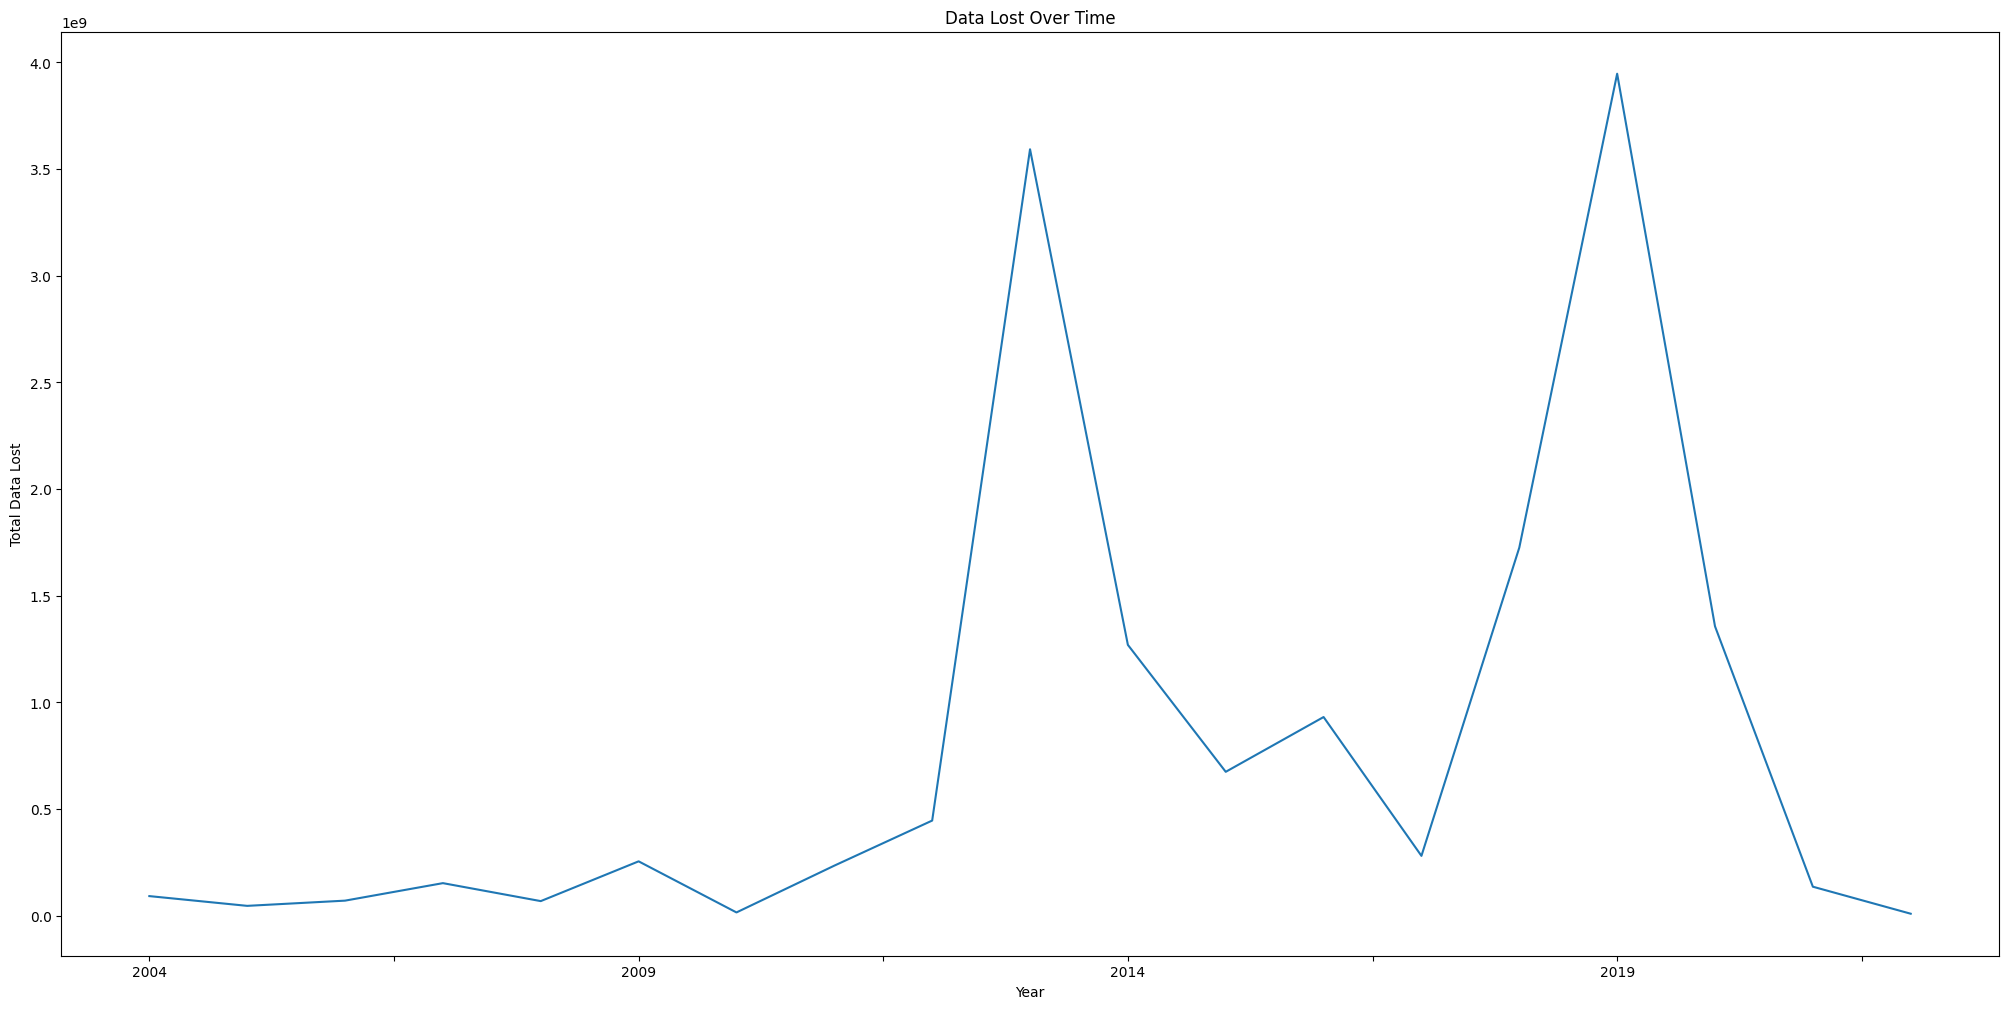

In [66]:
# Group the data by year and sum the records for each year
data_lost_over_time = df_vis.groupby('Year')['Records'].sum()

# Create a line plot for data lost over time
data_lost_over_time.plot(kind='line', figsize=(25, 12))
plt.title("Data Lost Over Time")
plt.xlabel("Year")
plt.ylabel("Total Data Lost")
plt.show()

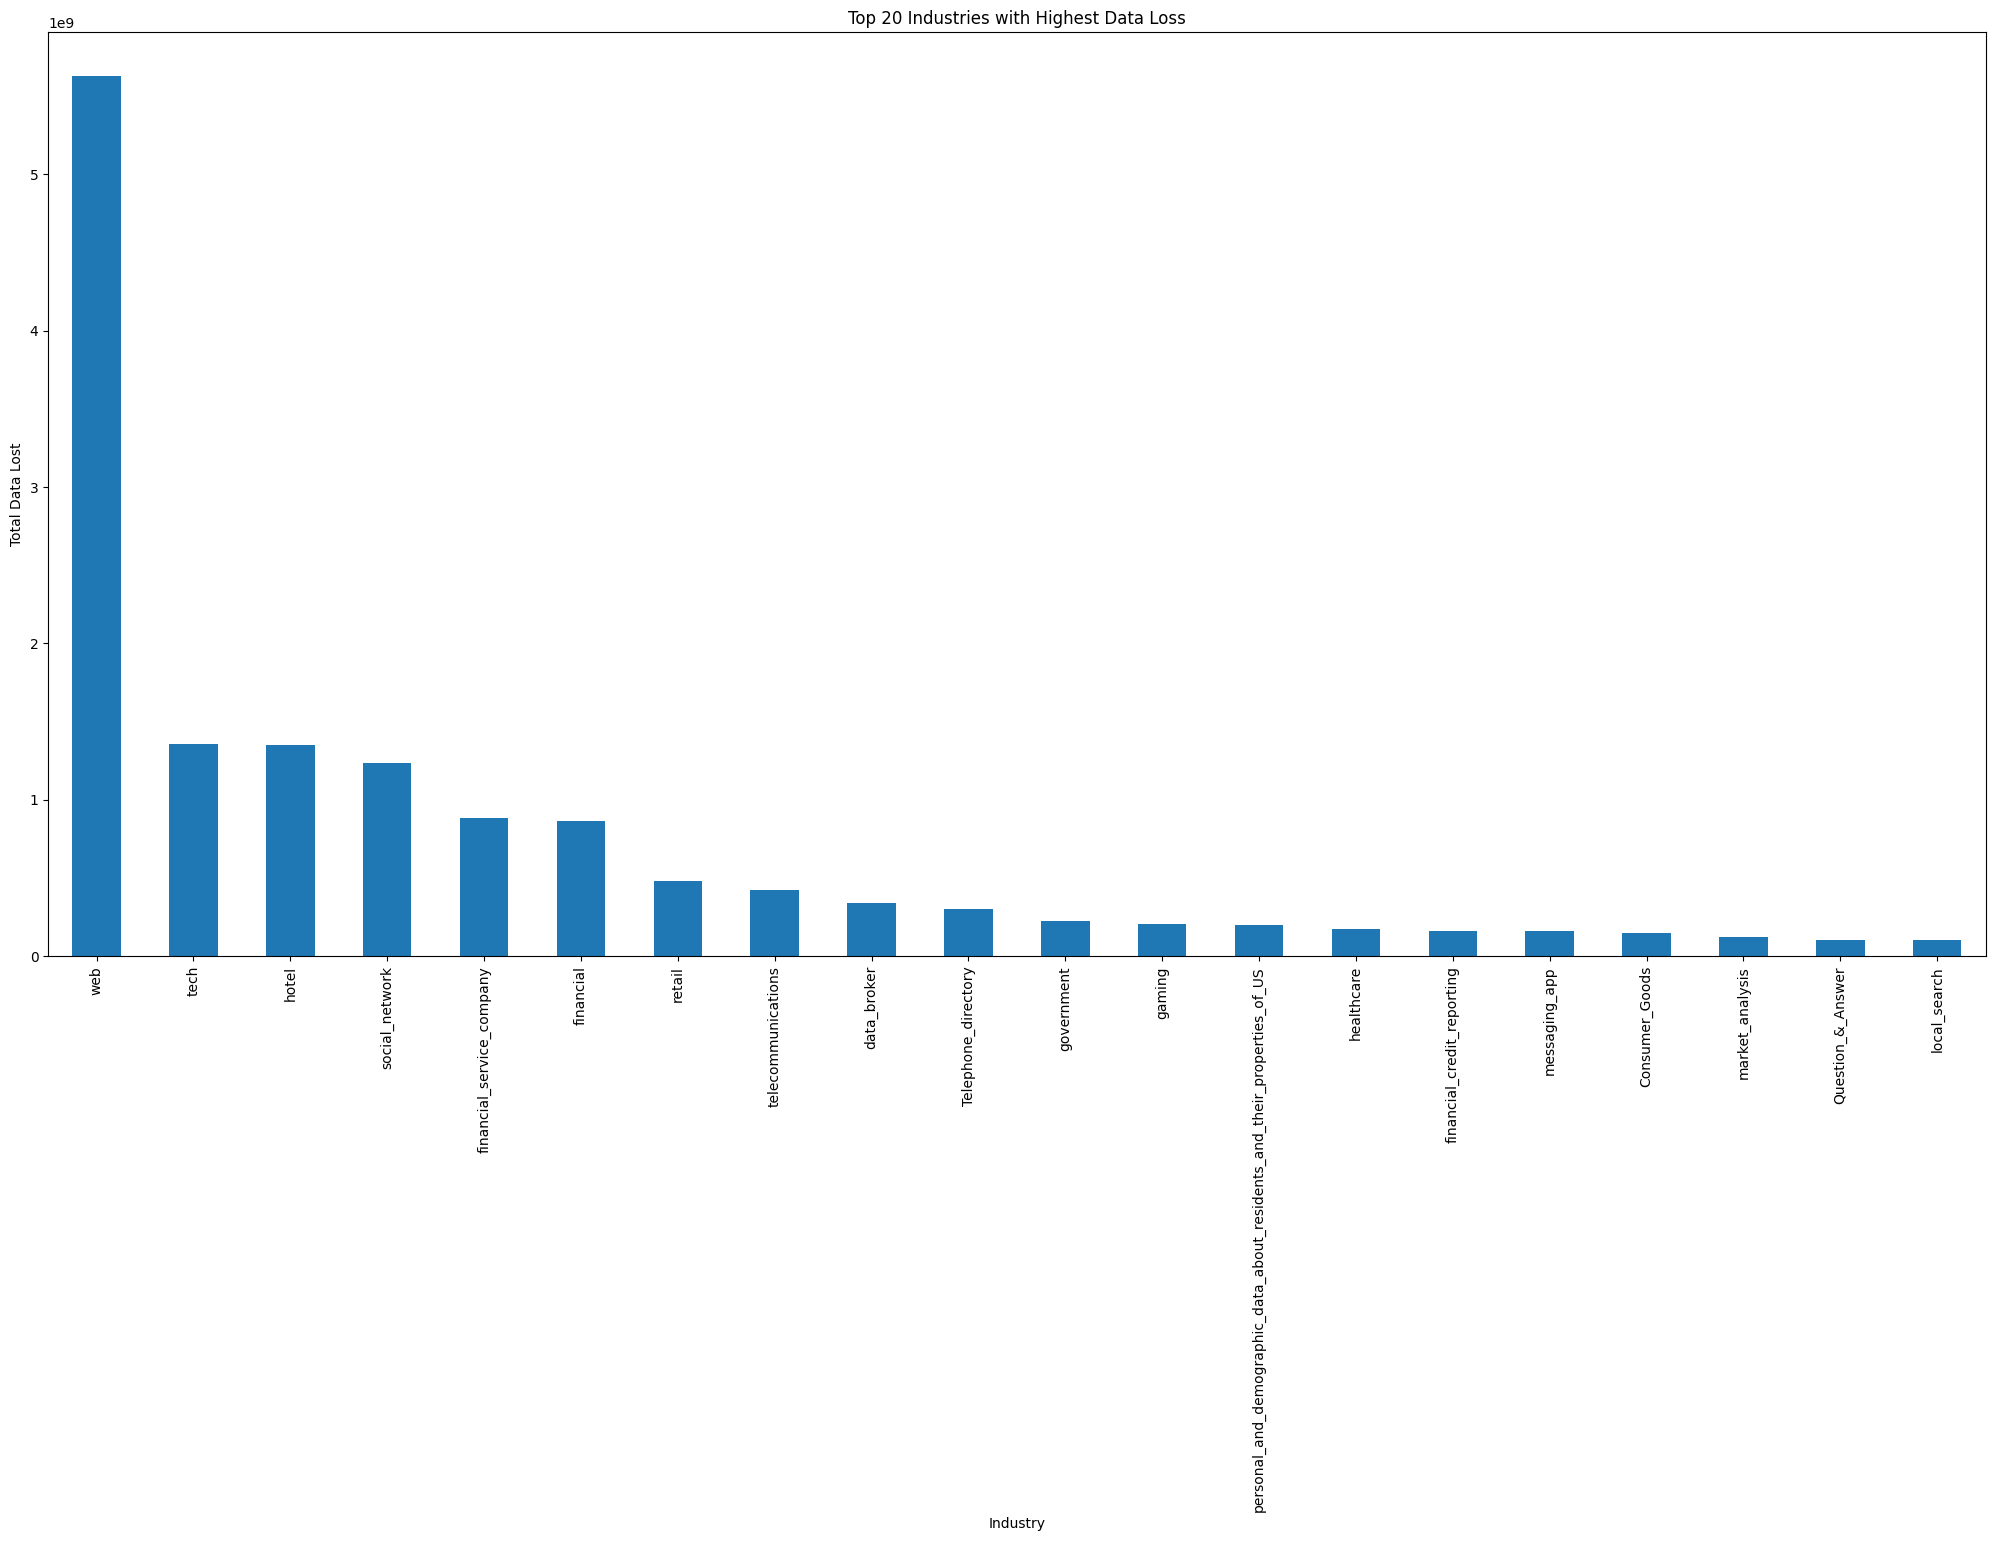

In [67]:
# Group the data by industry and sum the records for each industry, then select the top 20 industries
top_20_industries = df_vis.groupby('Organization type')['Records'].sum().nlargest(20)

# Create a bar plot for the top 10 industries with the highest data loss
top_20_industries.plot(kind='bar', figsize=(25, 12))
plt.title("Top 20 Industries with Highest Data Loss")
plt.xlabel("Industry")
plt.ylabel("Total Data Lost")
plt.xticks(rotation=90)
plt.show()

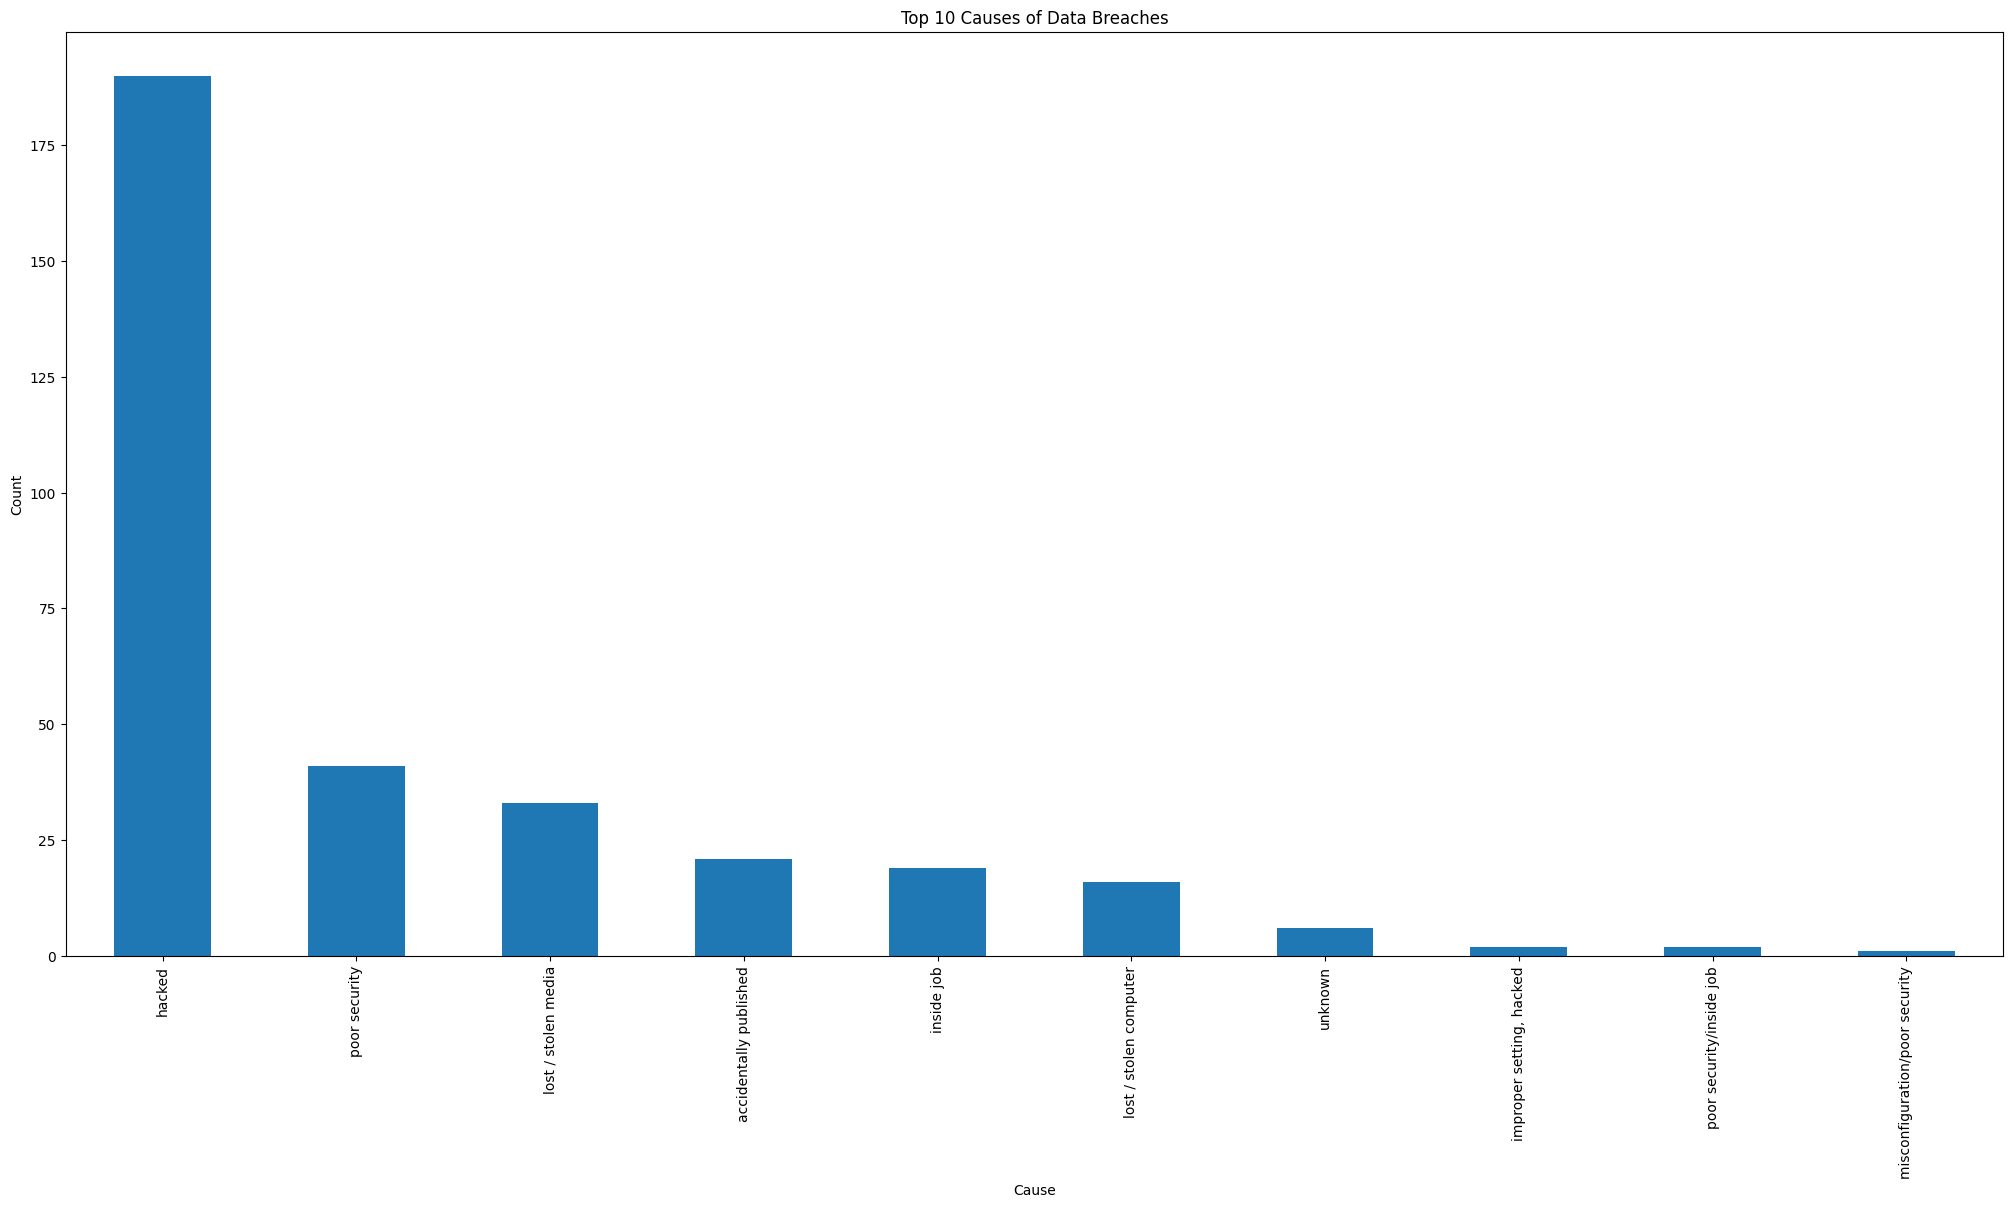

In [68]:
# Group the data by the method and count the occurrences, then select the top 10 causes
top_10_causes = df_vis['Method'].value_counts().nlargest(10)

# Create a bar plot for the top 10 causes of data breaches
top_10_causes.plot(kind='bar', figsize=(25, 12))
plt.title("Top 10 Causes of Data Breaches")
plt.xlabel("Cause")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


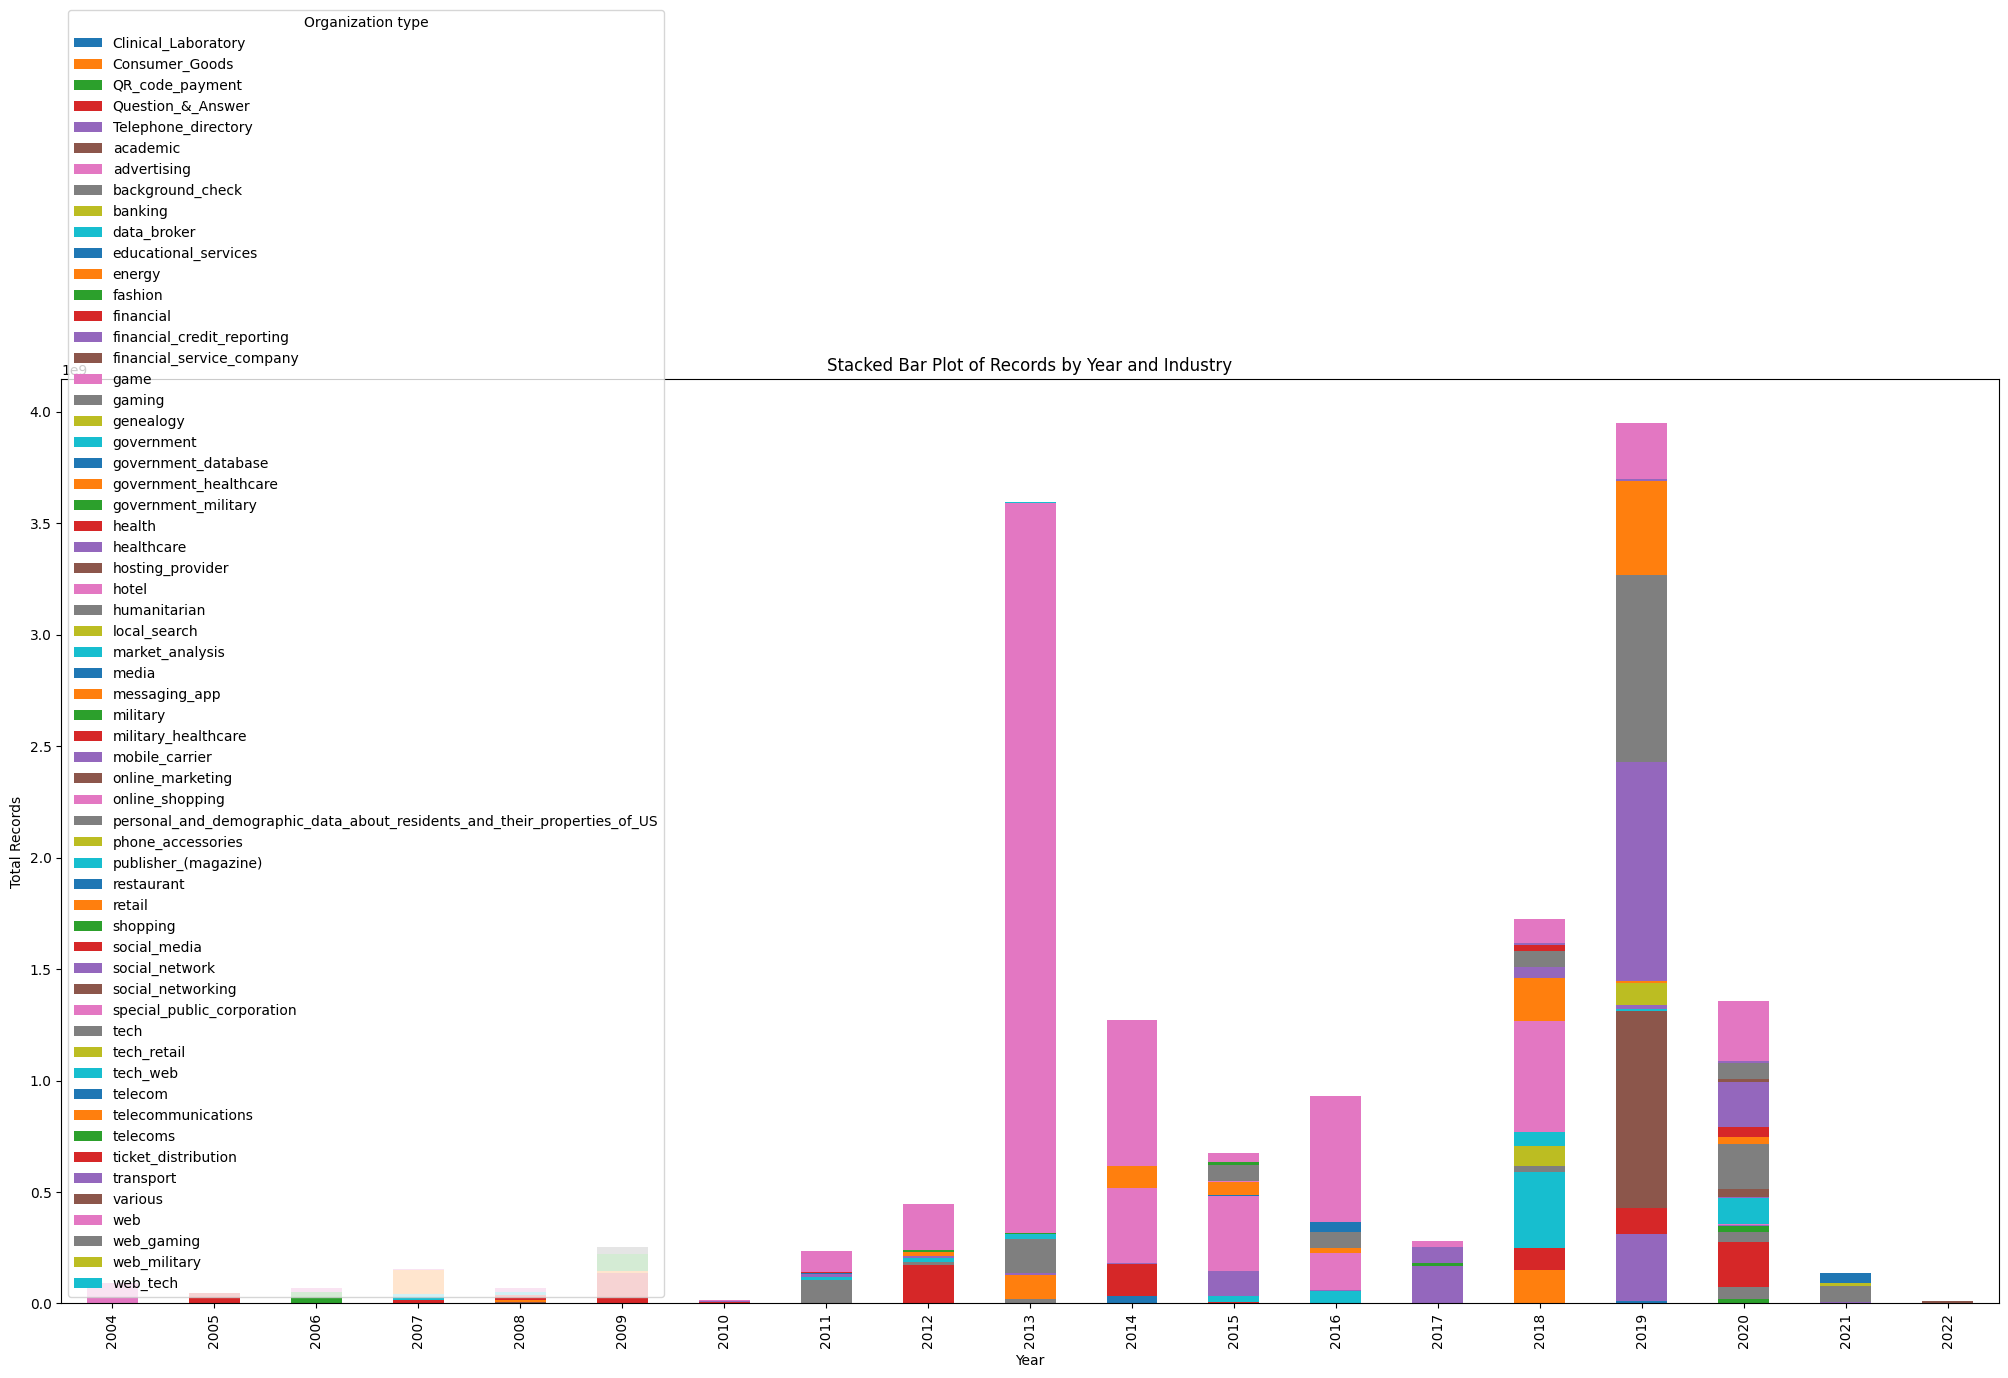

In [69]:
# Create a stacked bar plot of records by year and industry
records_by_year_and_industry = df_vis.pivot_table(index='Year', columns='Organization type', values='Records', aggfunc='sum')
records_by_year_and_industry.plot(kind='bar', stacked=True, figsize=(25, 12))
plt.title("Stacked Bar Plot of Records by Year and Industry")
plt.xlabel("Year")
plt.ylabel("Total Records")
plt.xticks(rotation=90)
plt.show()

In [71]:
le = LabelEncoder()  #perform label encoding on the organization_type, the copy of df_vis

# implement label encoding on the Organization type column
le.fit(df_vis['Organization type'])   # fit the data we want to train the encoder on
df_vis['Organization type'] = le.transform(df_vis['Organization type'])
# observe how the column 'Organization Type' has changed
df_vis.head()

,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,24,hacked
1,1.0,2020,14870304,45,hacked
2,2.0,2020,175350,24,poor security
3,3.0,2013,152000000,47,hacked
4,4.0,2019,7500000,47,poor security


In [72]:
df_vis.dtypes   # as we can see, the Organization type changed from Object --> integer datatype

Index                float64
Year                  object
Records                int64
Organization type      int64
Method                object
dtype: object

In [73]:
# observe the label frequency, to gain an understanding of outliers and inlier values
df_vis['Organization type'].value_counts()    # some values to note: 7 repeats 13 times, 18 repeats 38  times, 23 repeats 12 times, 25 repeats 30 times, 30 repeats 47 times, 49 repeats 27 times.

Organization type
56    53
24    47
13    38
19    30
41    27
47    19
5     13
17    12
52    12
26     9
44     8
54     8
32     7
11     4
40     4
30     3
50     2
21     2
43     2
34     2
48     2
51     2
22     2
1      1
57     1
2      1
12     1
0      1
3      1
38     1
49     1
20     1
59     1
29     1
53     1
35     1
18     1
4      1
33     1
27     1
36     1
58     1
6      1
10     1
8      1
16     1
7      1
25     1
23     1
31     1
14     1
9      1
15     1
37     1
45     1
46     1
42     1
28     1
39     1
55     1
Name: count, dtype: int64

In [74]:
df_vis['Method']  # we will also need to perform label encoding on the method section

0                      hacked
1                      hacked
2               poor security
3                      hacked
4               poor security
                ...          
340             poor security
341    accidentally published
342                    hacked
343                    hacked
344                    hacked
Name: Method, Length: 345, dtype: object

In [75]:
df_vis['Method'].unique()

array(['hacked', 'poor security', 'lost / stolen media',
       'accidentally published', 'inside job, hacked',
       'lost / stolen computer', 'unsecured S3 bucket', 'unknown',
       'inside job', 'accidentally uploaded', 'poor security / hacked',
       'Poor security', 'unprotected api', 'poor security/inside job',
       'data exposed by misconfiguration', 'intentionally lost',
       'misconfiguration/poor security', 'ransomware hacked',
       'rogue contractor', 'improper setting, hacked',
       'hacked/misconfiguration',
       'publicly accessible Amazon Web Services (AWS) server',
       'accidentally exposed', 'social engineering'], dtype=object)

In [76]:
""# seems like the method column contains certain NaN values and certain Unknown values, we will need to determine whether we replace such values or drop them in its entirety
df_vis['Method'].value_counts()     

Method
hacked                                                  190
poor security                                            41
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   6
improper setting, hacked                                  2
poor security/inside job                                  2
misconfiguration/poor security                            1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
unprotected api                                           1
intentionally lost               

In [77]:
#check which columns have null/unknoown values
null_mask = df.isnull().any(axis=1)
null_rows=df[null_mask]

print(null_rows)

     Index                               Entity  Year    Records  \
40      40                Bethesda Game Studios  2018        NaN   
69      69  Philippines Commission on Elections  2016   55000000   
83      83        Democratic National Committee  2016      19252   
192    192             Mobile TeleSystems (MTS)  2019  100000000   
337    337                            WordPress  2018        NaN   

      Organization type                          Method Sources  \
40               gaming          accidentally published    [53]   
69           government                          hacked     NaN   
83            political                             NaN   [106]   
192  telecommunications  misconfiguration/poor security     NaN   
337         web service                          hacked   [392]   

                                         hashed_Entity  
40   8506a2a312971641f5628bc44178b2c41e564141d10d4e...  
69   f7ddf80072a8eecdad46535cd4e2d9303e0bd21d124193...  
83   d3e8e2cd093c

In [78]:
#drop sources and index
#df_vis.drop(columns=['Index', 'Sources'], axis=1, inplace=True)
df_vis

,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,24,hacked
1,1.0,2020,14870304,45,hacked
2,2.0,2020,175350,24,poor security
3,3.0,2013,152000000,47,hacked
4,4.0,2019,7500000,47,poor security
...,...,...,...,...,...
340,350.0,2022,6400000,55,poor security
341,351.0,2022,95000,41,accidentally published
342,352.0,2020,6697200,54,hacked
343,353.0,2019,1000000,40,hacked


In [79]:
"""Two changes needs to be made regarding the method column
    1. Replace the "Unknown" value with the most frequently repeated word
    2. Drop any NaN values if it exists
"""
most_frequent_word = df_vis['Method'].value_counts().index[0]
#replace all occurences of "Unknown" with "Hacked"
df_vis['Method'].replace('unknown', most_frequent_word, inplace=True)
# drop any NaN values
df_vis.dropna(inplace=True)
# Print the dataframe
df_vis

,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,24,hacked
1,1.0,2020,14870304,45,hacked
2,2.0,2020,175350,24,poor security
3,3.0,2013,152000000,47,hacked
4,4.0,2019,7500000,47,poor security
...,...,...,...,...,...
340,350.0,2022,6400000,55,poor security
341,351.0,2022,95000,41,accidentally published
342,352.0,2020,6697200,54,hacked
343,353.0,2019,1000000,40,hacked


In [80]:
# let's verify if the method column contains any nan/null values
df_vis.isnull().all()   # seems that none of the values here contain any more null values, as we can see none of the datatype has any null values now

Index                False
Year                 False
Records              False
Organization type    False
Method               False
dtype: bool

In [81]:
print(list(df_vis['Method'].unique()))   # based on the list, we can see that the Method column doesn't contain unknown anymore.
list(df_vis['Method'].value_counts())   # we also gain insight into the frequency of the methods being repeated, there's 24 methods, therefore, the label encoding will range from 0-23

['hacked', 'poor security', 'lost / stolen media', 'accidentally published', 'inside job, hacked', 'lost / stolen computer', 'unsecured S3 bucket', 'inside job', 'accidentally uploaded', 'poor security / hacked', 'Poor security', 'unprotected api', 'poor security/inside job', 'data exposed by misconfiguration', 'intentionally lost', 'misconfiguration/poor security', 'ransomware hacked', 'rogue contractor', 'improper setting, hacked', 'hacked/misconfiguration', 'publicly accessible Amazon Web Services (AWS) server', 'accidentally exposed', 'social engineering']


[196, 41, 33, 21, 19, 16, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [82]:
# prior to implementing label encoding, we will need to clear up the string of some grammatical issues that will cause mismatched data when we train the model otherwise
# we want uniformity for the data input values
# convert all uppercase letters to lowercase
df_vis['Method'] = df_vis['Method'].str.lower()

# replace all spaces with "_"
df_vis['Method'] = df_vis['Method'].str.replace(' ', '_')

# replace all slash signs with "_"
df_vis['Method'] = df_vis['Method'].str.replace('/', '_')

# replace all __ and ___ with _
df_vis['Method'] = df_vis['Method'].str.replace('___', '_')
df_vis['Method'] = df_vis['Method'].str.replace('__', '_')

# check the updated dataframe
list(df_vis['Method'].unique())

['hacked',
 'poor_security',
 'lost_stolen_media',
 'accidentally_published',
 'inside_job,_hacked',
 'lost_stolen_computer',
 'unsecured_s3_bucket',
 'inside_job',
 'accidentally_uploaded',
 'poor_security_hacked',
 'unprotected_api',
 'poor_security_inside_job',
 'data_exposed_by_misconfiguration',
 'intentionally_lost',
 'misconfiguration_poor_security',
 'ransomware_hacked',
 'rogue_contractor',
 'improper_setting,_hacked',
 'hacked_misconfiguration',
 'publicly_accessible_amazon_web_services_(aws)_server',
 'accidentally_exposed',
 'social_engineering']

In [83]:
# now the method column is ready for label encoding preprocessing, since we already called on the label encoder previously, we can reuse it
le.fit(df_vis['Method'])  # train the label encoder on the column data we want to train
df_vis['Method'] = le.transform(df_vis['Method'])
df_vis   # observe that method has been successfully encoded by label

,Index,Year,Records,Organization type,Method
0,0.0,2016,2200000,24,4
1,1.0,2020,14870304,45,4
2,2.0,2020,175350,24,13
3,3.0,2013,152000000,47,4
4,4.0,2019,7500000,47,13
...,...,...,...,...,...
340,350.0,2022,6400000,55,13
341,351.0,2022,95000,41,1
342,352.0,2020,6697200,54,4
343,353.0,2019,1000000,40,4


In [87]:
#continue here  --> https://machinelearningmastery.com/building-a-regression-model-in-pytorch/

In [94]:
df_copy1['Method'].value_counts()  # judging by the values shown here, seems like 4 represents 'hacked'

Method
hacked                                                  192
poor security                                            43
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                  

In [95]:
# Use the inverse_transform method if you need to decode the method back to the original text
original_text = le.inverse_transform([4])
original_text[0]

'hacked'

In [96]:
df_copy1.dtypes  # reobserve the data, as we can see, the columns that are of object datatype needs to be changed

Index                  int64
Year                  object
Records              float64
Organization type     object
Method                object
dtype: object

In [97]:
object_to_numeric = ['Year', 'Records', 'hashed_Entity']
df_copy1[object_to_numeric] = df_copy1[object_to_numeric].apply(pd.to_numeric, errors="ignore", axis=1)   # we have successfully converted the dataframe from object to float, this ensures it's ready to be trained using machine learning model
df_copy1.dtypes

KeyError: "['hashed_Entity'] not in index"

In [ ]:
df_copy1

In [ ]:
df_copy1.isnull().values.any()   # the entirety of the dataframe does not contain any null values.

In [ ]:
df.columns

Marks the end of the data preprcoessing.

In [ ]:
# using the original tabel where the name of the Entities as well as the hashed entities are together, using that we can create a lookup table in the form of a dictionary

dictionary = {}  # create a dictionary that maps the hashed company names to the original company names

for index, row in df.iterrows():
    hashed_company_name = row["hashed_Entity"]
    original_company_name = row["Entity"]
    dictionary[hashed_company_name] = original_company_name
    

In [ ]:
dictionary   # we have successfully created a dictionary that maps the hashed values to the name of the original companues

In [ ]:
# add a new column to the DataFrame that maps the hashed company names to the original company names
df_copy1["original_Entity"] = df["hashed_Entity"].apply(lambda x: dictionary[x])

In [ ]:
df_copy1